In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},

{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},

//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
import re

In [3]:
def get_city_lonlat(coords):
    city = {}
    for l in coords.split('\n'):
        if l.startswith('//') or l.strip() == '':
            continue
        name = re.findall("name:'(\w+)'", l)[0]
        lonlat = re.findall("geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]", l)[0]
        city[name] = list(map(float, lonlat))
    return city

city_lonlat = get_city_lonlat(coordination_source)

In [4]:
city_lonlat

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

In [5]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [6]:
def calculate_city_distance(city_name1, city_name2):
    return geo_distance(city_lonlat[city_name1], city_lonlat[city_name2])

In [7]:
calculate_city_distance('西安', '银川')

329.61826831061916

In [8]:
import networkx as nw
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [9]:
city_lonlat

{'兰州': [103.73, 36.03],
 '嘉峪关': [98.17, 39.47],
 '西宁': [101.74, 36.56],
 '成都': [104.06, 30.67],
 '石家庄': [114.48, 38.03],
 '拉萨': [102.73, 25.04],
 '贵阳': [106.71, 26.57],
 '武汉': [114.31, 30.52],
 '郑州': [113.65, 34.76],
 '济南': [117.0, 36.65],
 '南京': [118.78, 32.04],
 '合肥': [117.27, 31.86],
 '杭州': [120.19, 30.26],
 '南昌': [115.89, 28.68],
 '福州': [119.3, 26.08],
 '广州': [113.23, 23.16],
 '长沙': [113.0, 28.21],
 '沈阳': [123.38, 41.8],
 '长春': [125.35, 43.88],
 '哈尔滨': [126.63, 45.75],
 '太原': [112.53, 37.87],
 '西安': [108.95, 34.27],
 '北京': [116.46, 39.92],
 '上海': [121.48, 31.22],
 '重庆': [106.54, 29.59],
 '天津': [117.2, 39.13],
 '呼和浩特': [111.65, 40.82],
 '南宁': [108.33, 22.84],
 '银川': [106.27, 38.47],
 '乌鲁木齐': [87.68, 43.77],
 '香港': [114.17, 22.28],
 '澳门': [113.54, 22.19]}

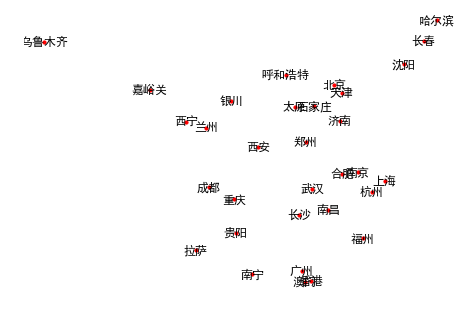

In [10]:
city_graph = nw.Graph()
city_graph.add_nodes_from(list(city_lonlat.keys()))
nw.draw(city_graph, city_lonlat, with_labels=True, node_size=10)

In [11]:
connect_distance = 700

In [12]:
from collections import defaultdict

In [13]:
def get_connection(city):
    city_connection = defaultdict(list)
    keys = city.keys()
    for k in keys:
        for t in keys:
            if k == t:
                continue
            if calculate_city_distance(t, k) < connect_distance:
                city_connection[t].append(k)
    return city_connection

city_connection = get_connection(city_lonlat)

In [14]:
city_connection

defaultdict(list,
            {'嘉峪关': ['兰州', '西宁', '成都', '拉萨'],
             '西宁': ['兰州', '嘉峪关', '成都', '拉萨', '贵阳', '重庆', '银川'],
             '成都': ['兰州', '嘉峪关', '西宁', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川'],
             '拉萨': ['兰州', '嘉峪关', '西宁', '成都', '贵阳', '重庆', '南宁', '银川'],
             '贵阳': ['兰州', '西宁', '成都', '拉萨', '西安', '重庆', '南宁', '银川'],
             '西安': ['兰州',
              '成都',
              '石家庄',
              '贵阳',
              '武汉',
              '郑州',
              '广州',
              '长沙',
              '太原',
              '重庆',
              '呼和浩特',
              '南宁',
              '银川'],
             '重庆': ['兰州', '西宁', '成都', '拉萨', '贵阳', '西安', '呼和浩特', '南宁', '银川'],
             '南宁': ['兰州',
              '成都',
              '拉萨',
              '贵阳',
              '广州',
              '长沙',
              '西安',
              '重庆',
              '银川',
              '香港',
              '澳门'],
             '银川': ['兰州',
              '西宁',
              '成都',
              '拉萨

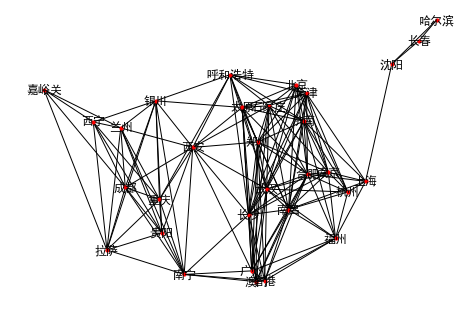

In [16]:
city_con_graph = nw.Graph(city_connection)
nw.draw(city_con_graph, city_lonlat, with_labels=True, node_size=10)

In [17]:
def bfs(graph, start, end):
    paths = [[start]]
    visited = set(start)
    while paths:
        path = paths.pop(0)
        successor = graph[path[-1]]
        for s in successor:
            if s in visited:
                continue
            new_path = path + [s]
            paths.append(new_path)
            if s == end:
                return new_path
            visited.add(s)

In [18]:
bfs(city_connection, '嘉峪关', '哈尔滨')

['嘉峪关', '兰州', '西安', '石家庄', '济南', '上海', '沈阳', '哈尔滨']

In [19]:
def dfs(graph, start, end):
    paths = [[start]]
    visited = set(start)
    while paths:
        path = paths.pop()
        successor = graph[path[-1]]
        for s in successor:
            if s in visited:
                continue
            new_path = path + [s]
            paths.append(new_path)
            if s == end:
                return new_path
            visited.add(s)

In [20]:
dfs(city_connection, '嘉峪关', '哈尔滨')

['嘉峪关', '拉萨', '银川', '呼和浩特', '天津', '上海', '沈阳', '哈尔滨']

In [21]:
def a_star(graph, start, end):
    paths = [[start]]
    distance = [[0, calculate_city_distance(start, end)]]
    visited = {start: 0}
    while paths:
        min_val = None
        min_index = 0
        for i in range(len(distance)):
            if min_val is None or min_val > distance[i][1]:
                min_val = distance[i][1]
                min_index = i
        
        v = paths[-1]
        paths[-1] = paths[min_index]
        paths[min_index] = v
        v = distance[-1]
        distance[-1] = distance[min_index]
        distance[min_index] = v
        
        path = paths.pop()
        d = distance.pop()
        p = path[-1]
        if p == end:
            return path
        successor = graph[p]
        for s in successor:
            s_dis = d[0] + calculate_city_distance(p, s)
            e_dis = s_dis + calculate_city_distance(s, end)
            if visited.get(s) is None or e_dis < visited[s]:
                visited[s] = e_dis
            else:
                continue
            
            paths.append(path + [s])
            distance.append([s_dis, e_dis])

In [22]:
a_star(city_connection, '嘉峪关', '哈尔滨')

['嘉峪关', '兰州', '西安', '郑州', '南京', '上海', '沈阳', '哈尔滨']

In [23]:
a_star(city_connection, '嘉峪关', '西安')

['嘉峪关', '兰州', '西安']

# Machine Learning

In [24]:
from sklearn.datasets import load_boston
import random
import numpy as np

In [25]:
dataset = load_boston()

In [26]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [27]:
x, y = dataset.data, dataset.target

In [28]:
x.shape

(506, 13)

In [29]:
y.shape

(506,)

In [30]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [31]:
x_nox = x[:,4]

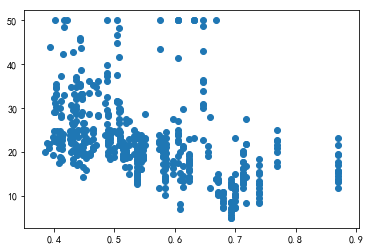

In [32]:
plt.scatter(x_nox, y)

In [33]:
def getY(x, k, b):
    return k * x + b

In [34]:
def loss(y1, y2):
    return sum((y1_ - y2_) ** 2 for y1_, y2_ in zip(list(y1), list(y2))) / len(list(y1))

In [35]:
def partial_derivative_k(x, y1, y2):
    return -2 / len(y1) * sum((y1_ - y2_) * x_ for x_, y1_, y2_ in zip(list(x), list(y1), list(y2)))

def partial_derivative_b(y1, y2):
    return -2 / len(y1) * sum((y1_ - y2_) for y1_, y2_ in zip(list(y1), list(y2)))

In [39]:
def general_function(k, b, x, y, count, learn_rate):
    losses = []
    for i in range(count):
        y_ = [getY(x_, k, b) for x_ in x]
        curr_loss = loss(y, y_)
        losses.append(curr_loss)
        k_par = partial_derivative_k(x, y, y_)
        b_par = partial_derivative_b(y, y_)
        k += -1 * k_par * learn_rate
        b += -1 * b_par * learn_rate
        print("The i is {}, the loss is {}, k is {} and b is {}".format(i, curr_loss, k, b))
    return k, b, losses

In [44]:
k, b, losses = general_function(random.random() * 200 - 100, random.random() * 200 - 100, x_nox, y, 2000, 1e-3)

The i is 0, the loss is 164.79259782846822, k is -38.14317682930831 and b is 53.440106920480346
The i is 1, the loss is 164.29588980202385, k is -38.15387949757188 and b is 53.42060798275318
The i is 2, the loss is 163.80178262917525, k is -38.16455366091617 and b is 53.401159916335885
The i is 3, the loss is 163.31026269033873, k is -38.175199394082476 and b is 53.38176258786276
The i is 4, the loss is 162.82131643725256, k is -38.18581677161613 and b is 53.36241586431776
The i is 5, the loss is 162.3349303926002, k is -38.19640586786703 and b is 53.34311961303357
The i is 6, the loss is 161.851091149641, k is -38.20696675699014 and b is 53.323873701690694
The i is 7, the loss is 161.36978537183958, k is -38.21749951294603 and b is 53.30467799831654
The i is 8, the loss is 160.8909997924988, k is -38.22800420950134 and b is 53.28553237128452
The i is 9, the loss is 160.41472121439372, k is -38.23848092022934 and b is 53.26643668931311
The i is 10, the loss is 159.9409365094067, k is -

The i is 208, the loss is 101.76137100788806, k is -39.85277636791624 and b is 50.30622639395102
The i is 209, the loss is 101.59468989255141, k is -39.858904477297045 and b is 50.294891830111766
The i is 210, the loss is 101.42888141854309, k is -39.865016076903544 and b is 50.28358673386418
The i is 211, the loss is 101.2639410162107, k is -39.87111121002896 and b is 50.27231102795731
The i is 212, the loss is 101.09986413983142, k is -39.87718991985301 and b is 50.261064635342706
The i is 213, the loss is 100.93664626748618, k is -39.88325224944222 and b is 50.24984747917395
The i is 214, the loss is 100.7742829009354, k is -39.8892982417502 and b is 50.23865948280607
The i is 215, the loss is 100.61276956549538, k is -39.895327939617935 and b is 50.227500569795055
The i is 216, the loss is 100.4521018099138, k is -39.90134138577411 and b is 50.21637066389729
The i is 217, the loss is 100.29227520624796, k is -39.90733862283538 and b is 50.20526968906906
The i is 218, the loss is 10

The i is 688, the loss is 72.48041867385665, k is -41.492386346508454 and b is 47.18960239373078
The i is 689, the loss is 72.46697540286625, k is -41.49400398680104 and b is 47.18632004500054
The i is 690, the loss is 72.45360233406956, k is -41.49561694687955 and b is 47.18304605556192
The i is 691, the loss is 72.44029909985528, k is -41.49722523902322 and b is 47.17978040350414
The i is 692, the loss is 72.42706533453631, k is -41.49882887547909 and b is 47.17652306697389
The i is 693, the loss is 72.41390067434078, k is -41.5004278684621 and b is 47.17327402417514
The i is 694, the loss is 72.40080475740214, k is -41.50202223015514 and b is 47.170033253369006
The i is 695, the loss is 72.38777722374806, k is -41.503611972709194 and b is 47.16680073287359
The i is 696, the loss is 72.37481771529195, k is -41.505197108243365 and b is 47.163576441063846
The i is 697, the loss is 72.36192587582198, k is -41.506777648844995 and b is 47.16036035637142
The i is 698, the loss is 72.349101

The i is 901, the loss is 70.74913234345864, k is -41.74835853279316 and b is 46.64871268521829
The i is 902, the loss is 70.74471382197925, k is -41.74921173634283 and b is 46.646796088919174
The i is 903, the loss is 70.74031824551412, k is -41.750062265733156 and b is 46.644884272348236
The i is 904, the loss is 70.73594549391765, k is -41.75091012798401 and b is 46.64297722297934
The i is 905, the loss is 70.73159544767314, k is -41.75175533009684 and b is 46.641074928319185
The i is 906, the loss is 70.72726798789044, k is -41.75259787905476 and b is 46.639177375907224
The i is 907, the loss is 70.72296299630099, k is -41.753437781822555 and b is 46.637284553315574
The i is 908, the loss is 70.71868035525664, k is -41.75427504534676 and b is 46.63539644814894
The i is 909, the loss is 70.71441994772434, k is -41.7551096765557 and b is 46.63351304804452
The i is 910, the loss is 70.71018165728431, k is -41.75594168235953 and b is 46.63163434067192
The i is 911, the loss is 70.70596

The i is 1140, the loss is 70.14217174338644, k is -41.889823551458754 and b is 46.30230955861816
The i is 1141, the loss is 70.14088573155452, k is -41.890201613445605 and b is 46.30124270846607
The i is 1142, the loss is 70.13960626296061, k is -41.890578249097324 and b is 46.30017841143252
The i is 1143, the loss is 70.13833330334813, k is -41.89095346216228 and b is 46.2991166608289
The i is 1144, the loss is 70.13706681864019, k is -41.891327256379 and b is 46.29805744998416
The i is 1145, the loss is 70.13580677493812, k is -41.891699635476215 and b is 46.297000772244715
The i is 1146, the loss is 70.134553138521, k is -41.89207060317289 and b is 46.29594662097444
The i is 1147, the loss is 70.13330587584413, k is -41.89244016317823 and b is 46.29489498955461
The i is 1148, the loss is 70.13206495353893, k is -41.89280831919171 and b is 46.29384587138383
The i is 1149, the loss is 70.13083033841107, k is -41.89317507490312 and b is 46.29279925987804
The i is 1150, the loss is 70.

The i is 1281, the loss is 70.01222789077995, k is -41.930621986988044 and b is 46.17428211602031
The i is 1282, the loss is 70.01159547674834, k is -41.93083181684289 and b is 46.173516582134646
The i is 1283, the loss is 70.01096618443282, k is -41.931040662674434 and b is 46.17275281209992
The i is 1284, the loss is 70.01033999749397, k is -41.93124852707139 and b is 46.171990801296765
The i is 1285, the loss is 70.00971689967794, k is -41.93145541261568 and b is 46.17123054511792
The i is 1286, the loss is 70.00909687481625, k is -41.93166132188247 and b is 46.17047203896822
The i is 1287, the loss is 70.00847990682449, k is -41.93186625744016 and b is 46.169715278264526
The i is 1288, the loss is 70.00786597970331, k is -41.93207022185043 and b is 46.16896025843572
The i is 1289, the loss is 70.00725507753626, k is -41.93227321766823 and b is 46.16820697492267
The i is 1290, the loss is 70.00664718449107, k is -41.93247524744182 and b is 46.1674554231782
The i is 1291, the loss is

The i is 1487, the loss is 69.92952178086267, k is -41.95633975773617 and b is 46.047989905771175
The i is 1488, the loss is 69.92928349337785, k is -41.9563929649408 and b is 46.04750548734675
The i is 1489, the loss is 69.92904626532551, k is -41.95644560056805 and b is 46.04702209678672
The i is 1490, the loss is 69.92881009116563, k is -41.956497666125294 and b is 46.04653973140125
The i is 1491, the loss is 69.92857496538696, k is -41.95654916311592 and b is 46.046058388507575
The i is 1492, the loss is 69.92834088250737, k is -41.9566000930394 and b is 46.045578065429936
The i is 1493, the loss is 69.92810783707311, k is -41.956650457391255 and b is 46.0450987594996
The i is 1494, the loss is 69.92787582365968, k is -41.956700257663094 and b is 46.044620468054845
The i is 1495, the loss is 69.92764483687012, k is -41.95674949534262 and b is 46.044143188440906
The i is 1496, the loss is 69.92741487133628, k is -41.95679817191363 and b is 46.04366691800999
The i is 1497, the loss i

The i is 1685, the loss is 69.89743353170131, k is -41.9574254954656 and b is 45.969091113188604
The i is 1686, the loss is 69.89732612761897, k is -41.95739047589529 and b is 45.96876569685605
The i is 1687, the loss is 69.89721909910605, k is -41.95735511780002 and b is 45.968440892505804
The i is 1688, the loss is 69.8971124442039, k is -41.95731942207612 and b is 45.96811669853833
The i is 1689, the loss is 69.89700616096329, k is -41.95728338961755 and b is 45.96779311335831
The i is 1690, the loss is 69.89690024744566, k is -41.957247021315936 and b is 45.9674701353746
The i is 1691, the loss is 69.89679470172275, k is -41.95721031806057 and b is 45.96714776300021
The i is 1692, the loss is 69.896689521876, k is -41.9571732807384 and b is 45.96682599465235
The i is 1693, the loss is 69.89658470599745, k is -41.95713591023407 and b is 45.96650482875235
The i is 1694, the loss is 69.89648025218841, k is -41.95709820742988 and b is 45.96618426372567
The i is 1695, the loss is 69.896

The i is 1891, the loss is 69.88103902954452, k is -41.94419587414737 and b is 45.91295657370719
The i is 1892, the loss is 69.88097914417992, k is -41.944107075211214 and b is 45.91272874964244
The i is 1893, the loss is 69.8809193871165, k is -41.94401808055379 and b is 45.91250128271315
The i is 1894, the loss is 69.88085975768999, k is -41.94392889069698 and b is 45.91227417198793
The i is 1895, the loss is 69.88080025523968, k is -41.94383950616131 and b is 45.91204741653782
The i is 1896, the loss is 69.88074087910805, k is -41.94374992746594 and b is 45.91182101543628
The i is 1897, the loss is 69.88068162864137, k is -41.943660155128654 and b is 45.91159496775923
The i is 1898, the loss is 69.8806225031891, k is -41.9435701896659 and b is 45.911369272584984
The i is 1899, the loss is 69.88056350210411, k is -41.943480031592756 and b is 45.91114392899429
The i is 1900, the loss is 69.88050462474284, k is -41.94338968142296 and b is 45.91091893607031
The i is 1901, the loss is 69

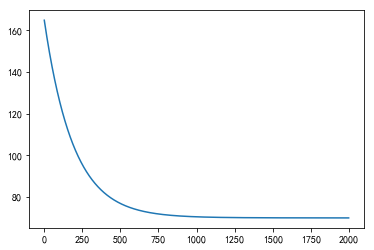

In [45]:
plt.plot(list(range(len(losses))),losses)

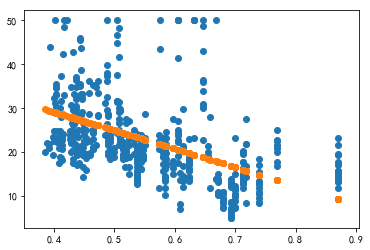

In [46]:
y_ = [getY(r, k, b) for r in x_nox]

plt.scatter(x_nox, y)
plt.scatter(x_nox, y_)